<a href="https://colab.research.google.com/github/Rucamont/MBA/blob/main/MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

plt.rcParams['figure.figsize'] = 16, 6

Data = pd.read_csv("ventas.csv",delimiter=';')


In [ ]:
Data

,Año,Semestre,Sucursal,Fecha,GrupoSCPM,EAN,CodSap,Producto,UM,Tipo,VentaNeta,Cantidad
0,2017,SEMESTRE 1,LA LIBERTAD,2017-01-01 00:00:00.000,Grupo 7 - Cebolla paiteña (fresco),940,NaN,CEBOLLA COLORADA,Kilogramo,Venta,"2,44","2,22"
1,2017,SEMESTRE 1,CALIFORNIA,2017-01-02 00:00:00.000,Grupo 1 - Arroz blanco,"7,8611E+12",NaN,ARROZ DE LA OLLA 2 KG,Unidades,Venta,3,1
2,2017,SEMESTRE 1,CALIFORNIA,2017-01-02 00:00:00.000,Grupo 14 - Atún enlatado,"7,22008E+11",NaN,ATUN VAN CAMPS DORADA 160 GR,Unidades,Venta,"8,1",5
3,2017,SEMESTRE 1,CALIFORNIA,2017-01-02 00:00:00.000,Grupo 9 - Pollo crudo,505,NaN,POLLO COMPLETO,Kilogramo,Venta,13,"4,236"
4,2017,SEMESTRE 1,CEIBOS,2017-01-02 00:00:00.000,Grupo 14 - Atún enlatado,"7,22008E+11",NaN,ATUN TRIPACK ACEITE ETIQ AZUL,Unidades,Venta,"2,69",1
...,...,...,...,...,...,...,...,...,...,...,...,...
101696,2017,SEMESTRE 2,PPG,2017-12-23 00:00:00.000,Grupo 1 - Arroz blanco,"7,86104E+12",NaN,ARROZ SUP.EXTRA 5 KG.,Unidades,Venta,"32,64",4
101697,2017,SEMESTRE 2,PPG,2017-12-23 00:00:00.000,Grupo 1 - Arroz blanco,"7,86104E+12",NaN,ARROZ SUP. EXTRA 11.3 KG,Unidades,Venta,"18,53",1
101698,2017,SEMESTRE 2,PPG,2017-12-23 00:00:00.000,Grupo 1 - Arroz blanco,"7,8611E+12",NaN,ARROZ DE LA OLLA 5 KG,Unidades,Venta,"15,12",2
101699,2017,SEMESTRE 2,PPG,2017-12-23 00:00:00.000,Grupo 10 - Carne de res cruda,4347,NaN,CARNE PARA ESTOFADO RES TERMO,Kilogramo,Venta,"15,65","2,63"


In [ ]:
df_x= Data[['Fecha','EAN','Producto','VentaNeta','tDetallado']]
df_x.dropna(axis=0,how='any', inplace=True)
df_x

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,fechaIniPedido,tIdentidad,cliente,tCodigoProducto,tDetallado
0,2022-10-28 13:53:00,1200309259,GLORIA CAMPELO SUAREZ,212.0,PORC. CHIMICHURRI
1,2021-11-02 15:49:00,9999999999,CLIENTE GENERICO,122.0,TOMAHAWK RES SELECCIONADO
2,2023-01-03 17:55:00,9999999999,CLIENTE GENERICO,217.0,CLUB VERDE
3,2023-01-23 12:09:00,0911945038,MIRIAN ZAVALA PIZA,525.0,6545 BIFE ANCHO NP CERDO
4,2022-05-24 13:00:00,0992142618001,CORPORACION FERNANDEZ CORPFERNANDEZ S.A,277.0,VASO NARANJA
...,...,...,...,...,...
14690,2023-01-08 14:36:00,0917298028001,GABRIELA ROLBASCALL,518.0,6426 BIFE ANCHO NP RES
14691,2022-04-21 21:47:00,1701418384,AIDA MANTILLA,170.0,4798 CUENCANO 450 GR
14692,2022-10-21 19:56:00,9999999999,CLIENTE GENERICO,682.0,6279 CHORIZO LIBANES
14693,2023-01-13 21:59:00,0926804287,NICOLE LOZANO,471.0,ARROZ C/MENESTRA AMARILLO


In [ ]:
df_x['Date'] = pd.to_datetime(df_x['fechaIniPedido'])
df_x['Year'] = df_x['Date'].apply(lambda x : x.year)
df_x['Month'] = df_x['Date'].apply(lambda x : x.month)
df_x['Day'] = df_x['Date'].apply(lambda x : x.dayofweek)

DaysOfWeek = ['Lunes', 'Martes', 'Miercoles', 'Jueves', 'Viernes', 'Sabado', 'Domingo']
MonthsOfYear = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Augosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']

<ipython-input-4-fae119367bd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Date'] = pd.to_datetime(df_x['fechaIniPedido'])
<ipython-input-4-fae119367bd4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['Year'] = df_x['Date'].apply(lambda x : x.year)
<ipython-input-4-fae119367bd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.or

In [ ]:
Data =df_x

Text(0.5, 1.0, 'Distribucion de compras en los meses de año')

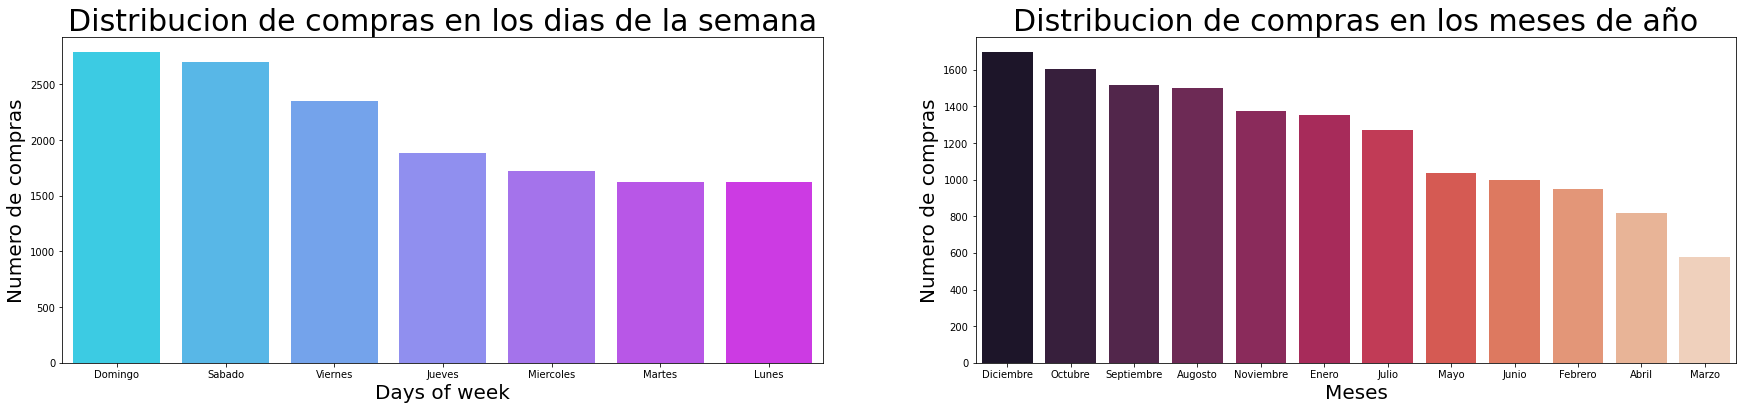

In [ ]:
f, ax = plt.subplots(1,2,figsize=(30, 6))

Frame = pd.DataFrame(DaysOfWeek)
Compras = []
for index, day in enumerate(DaysOfWeek):
    Filter = Data[Data['Day'] == index]
    Compras.append(len(Filter))

Frame[1] = Compras
Frame = Frame.sort_values(by = 1,ascending=False)

Plot = sns.barplot(x = Frame[0], y = Frame[1], palette='cool', ax=ax[0])
Plot.set_xlabel('Days of week', fontsize=20)
Plot.set_ylabel('Numero de compras', fontsize=20)
Plot.set_title('Distribucion de compras en los dias de la semana', fontsize=30)

Frame = pd.DataFrame(MonthsOfYear)
Compras = []
for index, Month in enumerate(MonthsOfYear):
    Filter = Data[Data['Month'] == index+1]
    Compras.append(len(Filter))

Frame[1] = Compras
Frame = Frame.sort_values(by = 1,ascending=False)

Plot2 = sns.barplot(x = Frame[0], y = Frame[1], palette='rocket', ax=ax[1])
Plot2.set_xlabel('Meses', fontsize=20)
Plot2.set_ylabel('Numero de compras', fontsize=20)
Plot2.set_title('Distribucion de compras en los meses de año', fontsize=30)

In [ ]:
Data['fechaIniPedido'].min()

'2021-07-24 13:56:00'

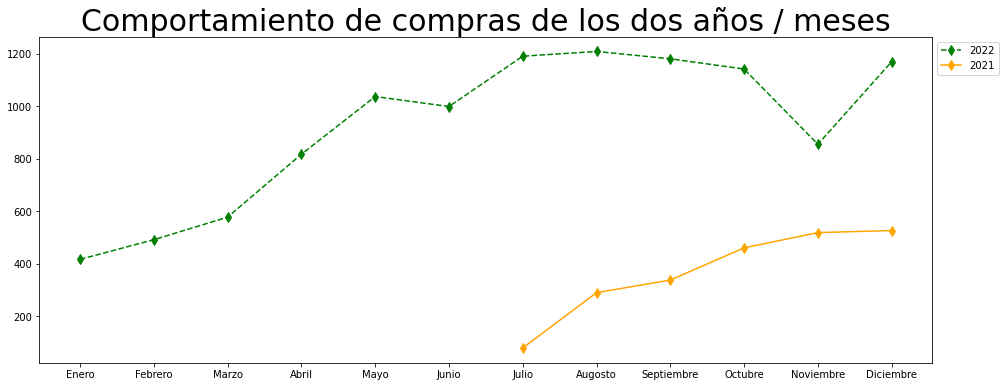

In [ ]:
#Comportamiento de compras en los dos años
Frame = Data[Data['Year'] == 2022].Month.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='green', ls='--', marker = 'd', ms=7, label='2022')

Frame = Data[Data['Year'] == 2021].Month.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='orange', ls='-', marker = 'd', ms=7, label='2021')

plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xticks(list(range(1,13)), MonthsOfYear)
plt.title('Comportamiento de compras de los dos años / meses', fontsize=30)
plt.show()

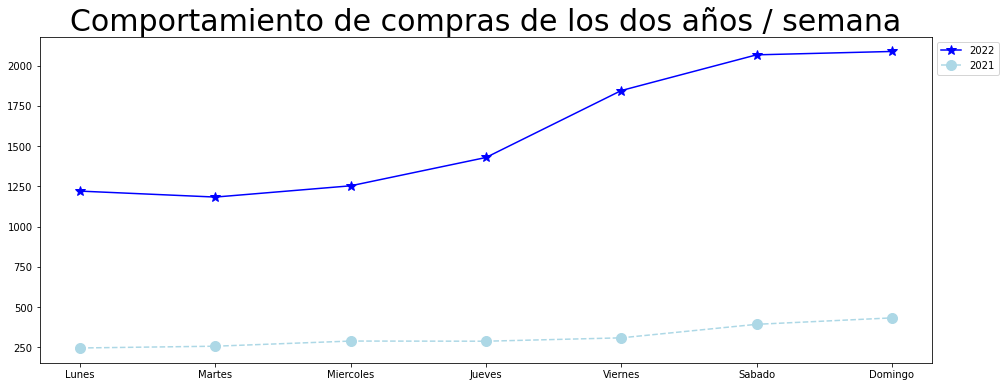

In [ ]:
Frame = Data[Data['Year'] == 2022].Day.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='blue', ls='-', marker = '*', ms=10, label='2022')

Frame = Data[Data['Year'] == 2021].Day.value_counts().sort_index(ascending=True)
plt.plot(Frame, c='lightblue', ls='--', marker = 'o', ms=10, label='2021')

plt.legend(loc='best', bbox_to_anchor=(1,1))
plt.xticks(list(range(0,7)), DaysOfWeek)
plt.title('Comportamiento de compras de los dos años / semana', fontsize=30)
plt.show()

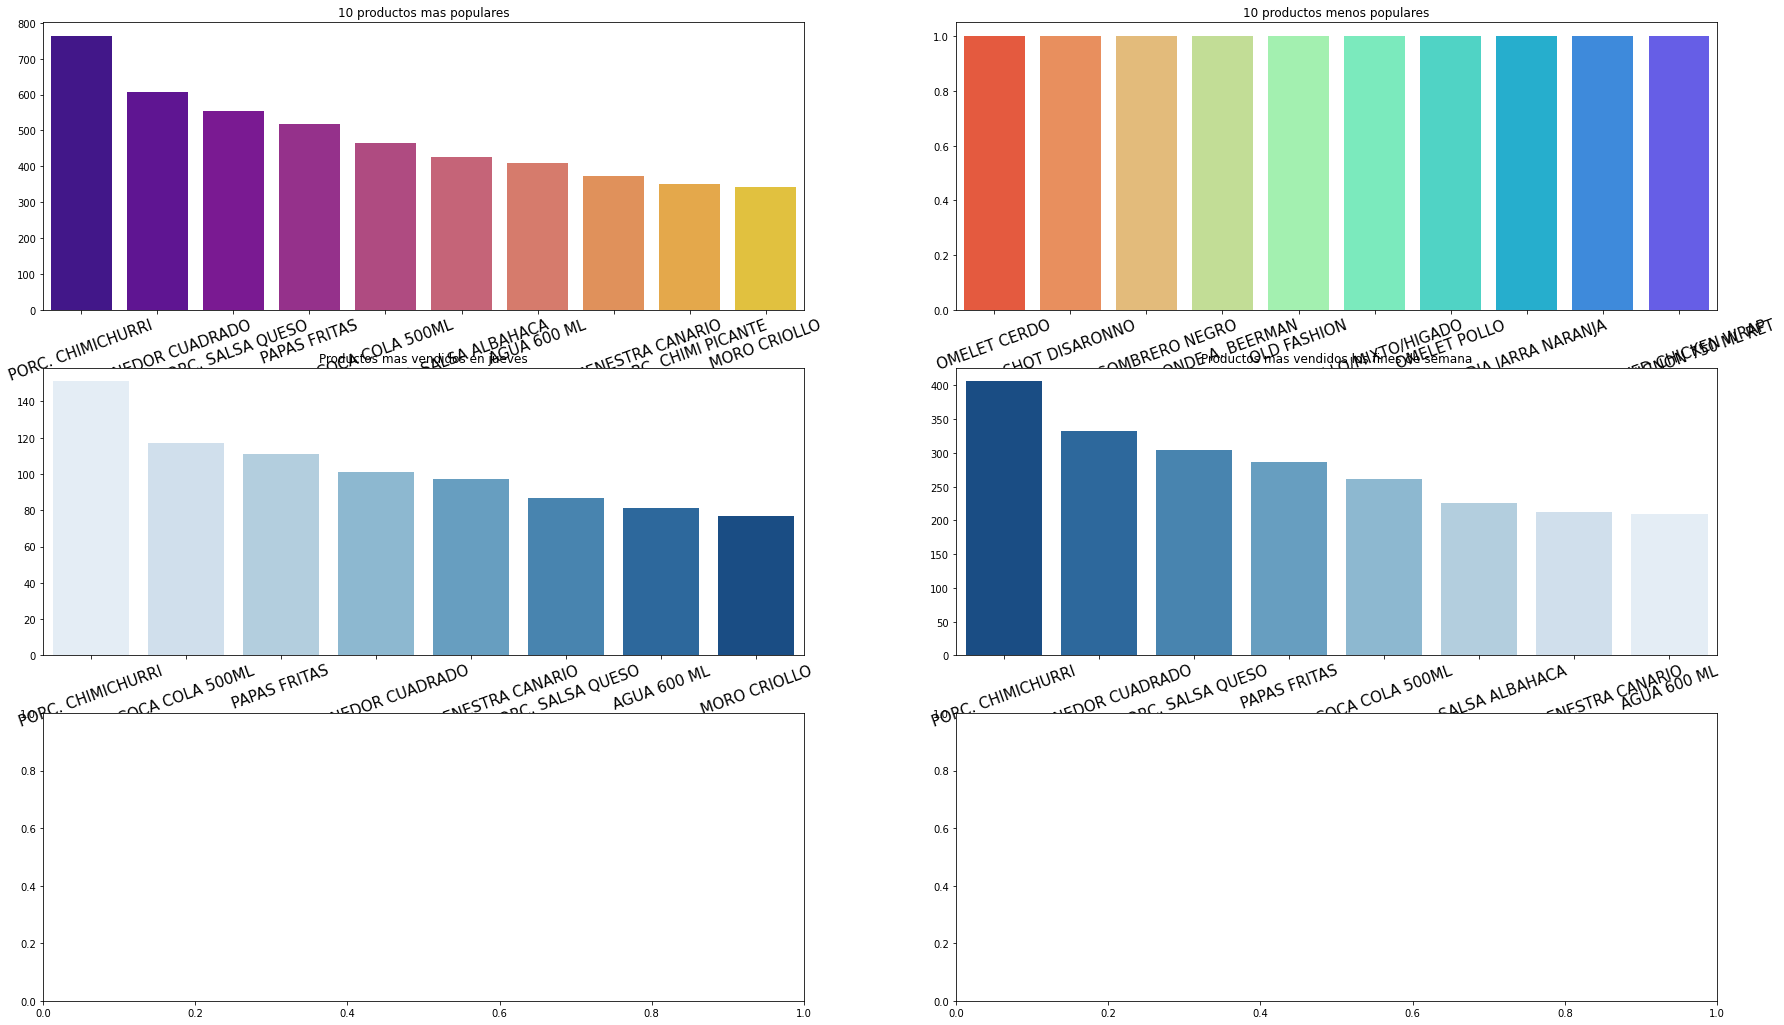

In [ ]:
f, ax = plt.subplots(3,2,figsize=(30, 18))

def BarPlot(x, y, ax, title, palette):
    Plot = sns.barplot(x = x, y= y, ax=ax, palette=palette)
    Plot.set_title(title, fontsize=12)
    Plot.set_xticklabels(Plot.get_xticklabels(), rotation=20, fontsize=15)

Frame = Data['tDetallado'].value_counts().sort_values(ascending = False)[:10]
BarPlot(Frame.index, Frame.values, ax[0,0], '10 productos mas populares', 'plasma')


Frame = Data['tDetallado'].value_counts().sort_values(ascending = True)[:10]
BarPlot(Frame.index, Frame.values, ax[0,1], '10 productos menos populares', 'rainbow_r')

Frame = Data[(Data['Day'] == 6)]
Frame = Frame['tDetallado'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[1,0], 'Productos mas vendidos en jueves', 'Blues')

Frame = Data[(Data['Day'] == 6) | (Data['Day'] == 5) | (Data['Day'] == 4)]
Frame = Frame['tDetallado'].value_counts().sort_values(ascending=False)[:8]
BarPlot(Frame.index, Frame.values, ax[1,1], 'Productos mas vendidos los fines de semana', 'Blues_r')

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5973 sha256=583ff4b1d99870495db6b4b245a47ac7193c09f65a9ed5669fb7894addc577a8
  Stored in directory: /root/.cache/pip/wheels/1b/02/6c/a45230be8603bd95c0a51cd2b289aefdd860c1a100eab73661
Successfully built apyori


In [ ]:
from apyori import apriori

OneHot = pd.get_dummies(Data['tDetallado'])
AprioriData = pd.DataFrame(Data)
AprioriData.drop(['tDetallado'], inplace=True, axis=1)
AprioriData = AprioriData.join(OneHot)

Products = Data.tDetallado.unique()
AprioriData = AprioriData.groupby(['tIdentidad', 'Date'])[Products[:]].sum()
AprioriData = AprioriData.reset_index()
AprioriData.head()

,tIdentidad,Date,PORC. CHIMICHURRI,TOMAHAWK RES SELECCIONADO,CLUB VERDE,6545 BIFE ANCHO NP CERDO,VASO NARANJA,CONTENEDOR CUADRADO,6062 CUENCANO X3,PORC. CHIMI PICANTE,...,TOMATE LIMPIO RET,ZANAHORIA LIMPIA RET,BIFE ANCHO DE CERDO TERMO DON EUGENIO RET,PERONI NASTRO AZZURRO RET,MICHELADA CLUBPLATINO 2 X $5.99,Chorizo Cervecero,FERNET BRANCA,Lomo de cerdo en medallones,AJO EN POLVO RET,TIGRILLO/QUESO
0,0.921519492,2023-01-13 19:53:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,001303286635,2022-12-14 22:39:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,001918843962,2021-12-11 14:41:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0020177689051,2022-10-12 21:27:00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0020177689051,2022-10-12 22:54:00,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
AprioriData = AprioriData.drop(['tIdentidad', 'Date'], axis=1)


In [ ]:
def Names(x):
    for Product in Products:
        if x[Product] != 0:
            x[Product] = Product
    return x

AprioriData = AprioriData.apply(Names, axis=1)
AprioriData.head()

,PORC. CHIMICHURRI,TOMAHAWK RES SELECCIONADO,CLUB VERDE,6545 BIFE ANCHO NP CERDO,VASO NARANJA,CONTENEDOR CUADRADO,6062 CUENCANO X3,PORC. CHIMI PICANTE,FANTA 400ML,JARRA NARANJA,...,TOMATE LIMPIO RET,ZANAHORIA LIMPIA RET,BIFE ANCHO DE CERDO TERMO DON EUGENIO RET,PERONI NASTRO AZZURRO RET,MICHELADA CLUBPLATINO 2 X $5.99,Chorizo Cervecero,FERNET BRANCA,Lomo de cerdo en medallones,AJO EN POLVO RET,TIGRILLO/QUESO
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,6545 BIFE ANCHO NP CERDO,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
AprioriArray = AprioriData.values
Transactions = []

for i in range(AprioriArray.shape[0]):
    x = []
    for j in range(AprioriArray.shape[1]):
        if AprioriArray[i,j] != 0:
            x.append(AprioriArray[i,j])
    Transactions.append(x)

Transactions[0:20]

[['6558 MATAMBRE CERDO NP'],
 ['5949 LOMO FINO+ARGENTINO'],
 ['BIFE ANGOSTO DE RES SELECCIONADO'],
 ['ENSALADA QUESO AZUL'],
 ['6545 BIFE ANCHO NP CERDO', '6436 PANCETA PER. NP CER'],
 ['4772 CHISTORRA 200 GR', 'TABLA DE EMPANADAS X 8', 'SHOT MICHELADA'],
 ['VASO LIMONADA', '6553 TOMAHAWK CERDO NP'],
 ['PORC. CHIMI PICANTE'],
 ['CONTENEDOR CUADRADO', 'MADUROS CON QUESO'],
 ['PORC. CHIMICHURRI', 'GUITIG 330ML'],
 ['PORC. SALSA ALBAHACA', 'SHOT MICHELADA'],
 ['ARROZ C/MENESTRA CANARIO', '6054 MORCILLA X3', 'INFUSION MANZANILLA'],
 ['5198 PECHUGA CANTONESA'],
 ['6526 BEEF ARM STEAK NP R'],
 ['PAPAS FRITAS'],
 ['CLUB VERDE'],
 ['ENSALADA FRESCA', 'BIFE ANCHO RES DISPONIBLE'],
 ['MADUROS CON QUESO'],
 ['MORO CUBANO', 'SPRITE 400ML'],
 ['VEGETALES AL GRILL', 'COCA COLA ZERO 410ML']]

In [ ]:
#Modelo apriori
Rules = apriori(
    transactions = Transactions,
    min_support = 0.0003,
    min_confidence = 0.05,
    min_lift = 3,
    min_length = 2,
)

AssociationRules = list(Rules)

for item in AssociationRules:

    par = item[0] 
    items = [x for x in par]
    print("Regla:       " + items[0] + " -> " + items[1])
    print("Soporte:     " + str(item[1]))
    print("Confianza:   " + str(item[2][0][2]))
    print("Mejora lift: " + str(item[2][0][3]))
    print("***************************************************")

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Regla:       PORC. SALSA ALBAHACA -> PORC. SALSA QUESO
Soporte:     0.000310903841883189
Confianza:   0.1926605504587156
Mejora lift: 82.36238532110092
***************************************************
Regla:       CONTENEDOR CUADRADO -> 6053 ARGENTINO X3
Soporte:     0.000310903841883189
Confianza:   0.23076923076923078
Mejora lift: 63.62166405023548
***************************************************
Regla:       CONTENEDOR CUADRADO -> 6053 ARGENTINO X3
Soporte:     0.00034051373158634985
Confianza:   0.25274725274725274
Mejora lift: 43.43972821072058
***************************************************
Regla:       CONTENEDOR CUADRADO -> ARROZ C/MENESTRA CANARIO
Soporte:     0.0003701236212895107
Confianza:   0.1592356687898089
Mejora lift: 58.45420243699806
***************************************************
Regla:       CONTENEDOR CUADRADO -> ARROZ C/MENESTRA CANARIO
Soporte:     0.00038492856614109113
Confianza: 